UPPGIFT 2a: Interpolationspolynom
Antal datapunkter: 12
Gradtal på interpolationspolynomet: 11

1. NAIV ANSATS
Koefficienter: [-3.86799989e+03  1.23635035e+04 -1.47443575e+04  9.76857468e+03
 -3.99956291e+03  1.07264403e+03 -1.93643304e+02  2.36762012e+01
 -1.93269668e+00  1.00870807e-01 -3.04453249e-03  4.04341010e-05]

2. CENTRERAD ANSATS
Medelvärde tm = 6.5
Koefficienter: [ 1.10412802e+03 -4.50879924e+01 -6.78340812e+01  8.63922487e+00
  5.37538516e+00 -1.17044142e+00 -3.52353154e-01  8.64440724e-02
  1.20236028e-02 -3.06506283e-03 -1.53494268e-04  4.04341029e-05]

3. NEWTONS ANSATS (Dividerade differenser)
Koefficienter: [ 4.21000000e+02  1.32000000e+02  1.20000000e+01 -3.00000000e+00
  0.00000000e+00 -2.66666667e-01  6.25000000e-02  1.32936508e-02
 -9.27579365e-03  2.36166226e-03 -3.75881834e-04  4.04341029e-05]

Maximala skillnader mellan polynomen:
  |p1 - p2|_max = 1.12e-04
  |p1 - p3|_max = 1.12e-04
  |p2 - p3|_max = 1.30e-10


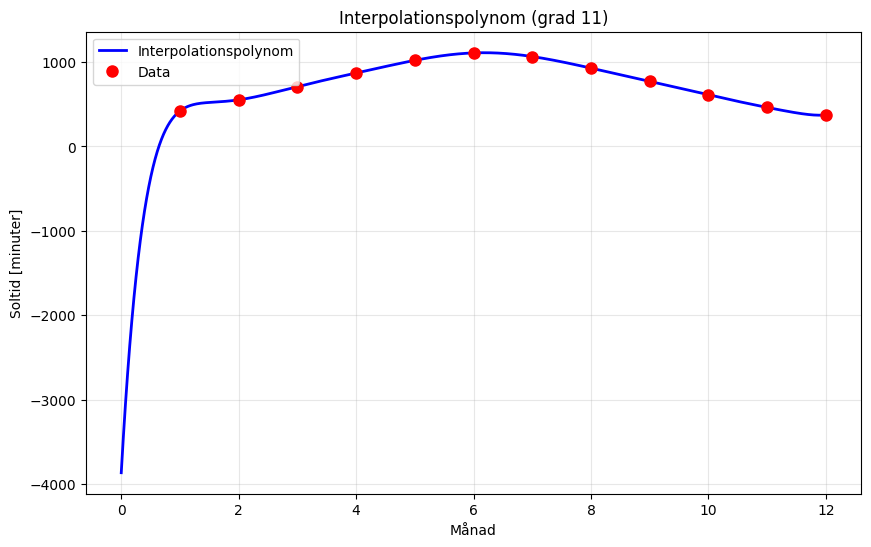


Minstakvadratfel: 6.40e-14 (≈0 för interpolation)
UPPGIFT 2b: Konditionstal
Konditionstal (maxnorm):
  Naiv ansats:      κ(V1) = 1.16e+16
  Centrerad ansats: κ(V2) = 4.95e+08
  Newtons ansats:   κ(V3) = 2.17e+08
UPPGIFT 2c: Minstakvadrat - andragradspolynom
Använd data från månad 4 till 8
Koefficienter [c0, c1, c2]: [-809.54285714  620.38571429  -50.35714286]


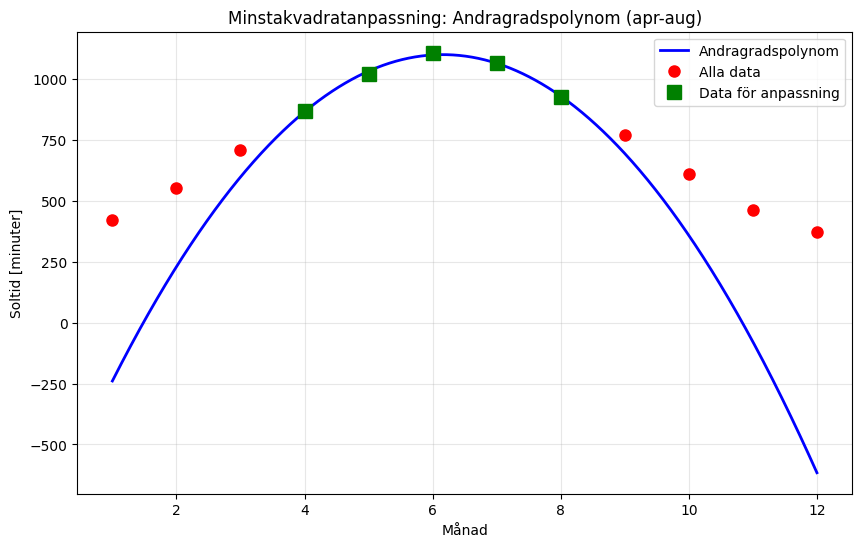

Minstakvadratfel (alla data): 1897236.89
UPPGIFT 2d: Minstakvadrat - tredjegradspolynom
Koefficienter [c0, c1, c2, c3]: [-287.94285714  341.45238095   -2.35714286   -2.66666667]


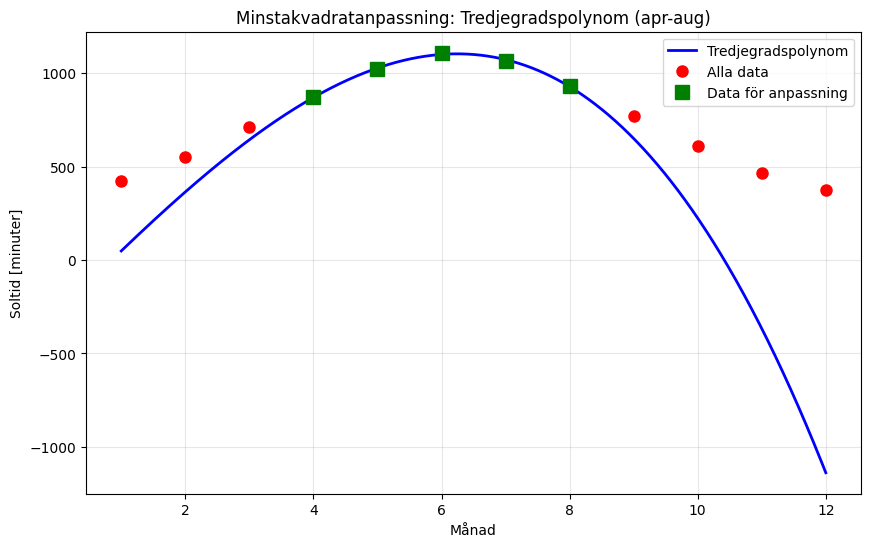

Minstakvadratfel (alla data): 3317949.12
UPPGIFT 2e: Minstakvadrat - trigonometrisk funktion
ω = 2π/12 = 0.5236
Koefficienter [d0, d1, d2]: [ 741.58333333 -349.05476013  -34.47082871]


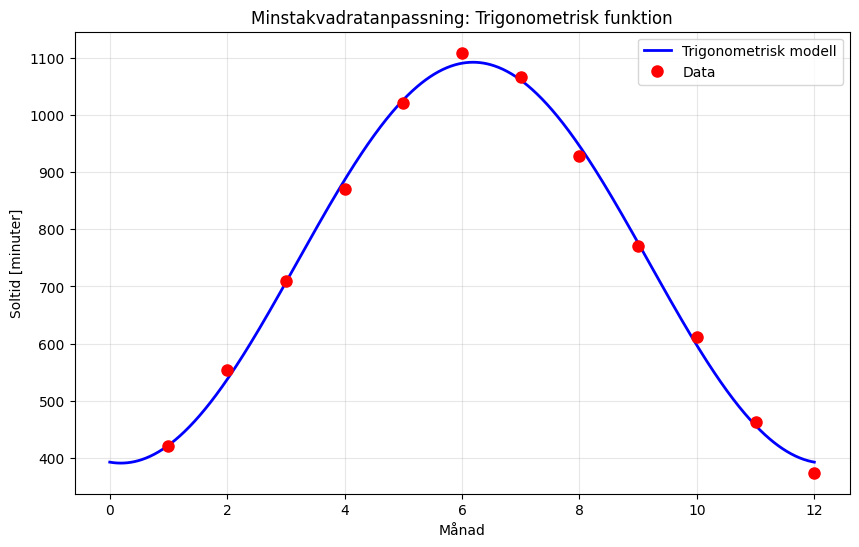

Minstakvadratfel: 1806.14
UPPGIFT 2f: Konditionstal för normalekvationerna
Konditionstal (maxnorm) för A^T A:
  Uppgift c (grad 2): κ = 1.20e+06
  Uppgift d (grad 3): κ = 2.31e+09
  Uppgift e (trig):   κ = 2.00e+00


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data från tabellen
t_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
soltid_data = np.array([421, 553, 709, 871, 1021, 1109, 1066, 929, 771, 612, 463, 374])

def minstakvadratfel(y_data, y_model):
    # Beräkna minstakvadratfelet (i kvadrat)
    return np.sum((y_data - y_model)**2)

def uppgift_2a():
    print("UPPGIFT 2a: Interpolationspolynom")
    
    n = len(t_data)
    grad = n - 1
    print(f"Antal datapunkter: {n}")
    print(f"Gradtal på interpolationspolynomet: {grad}")
    
    # 1. Naiv ansats: p1(t) = c0 + c1*t + c2*t^2 + ...
    print("\n1. NAIV ANSATS")
    V1 = np.vander(t_data, increasing=True)  # Vandermonde-matris
    c1 = np.linalg.solve(V1, soltid_data)
    print(f"Koefficienter: {c1}")
    
    # 2. Centrerad ansats: p2(t) = c0 + c1*(t-tm) + c2*(t-tm)^2 + ...
    print("\n2. CENTRERAD ANSATS")
    tm = np.mean(t_data)
    print(f"Medelvärde tm = {tm}")
    t_centrerad = t_data - tm
    V2 = np.vander(t_centrerad, increasing=True)
    c2 = np.linalg.solve(V2, soltid_data)
    print(f"Koefficienter: {c2}")
    
    # 3. Newtons ansats: p3(t) = c0 + c1*(t-t1) + c2*(t-t1)*(t-t2) + ...
    print("\n3. NEWTONS ANSATS (Dividerade differenser)")
    c3 = dividerade_differenser(t_data, soltid_data)
    print(f"Koefficienter: {c3}")
    
    # Evaluera polynomen i 1000 punkter
    t_eval = np.linspace(0, 12, 1000)
    
    # Evaluera p1
    p1_eval = np.polyval(c1[::-1], t_eval)
    
    # Evaluera p2
    p2_eval = np.polyval(c2[::-1], t_eval - tm)
    
    # Evaluera p3
    p3_eval = newton_polynom_eval(c3, t_data, t_eval)
    
    # Beräkna maximala skillnaden
    max_diff_12 = np.max(np.abs(p1_eval - p2_eval))
    max_diff_13 = np.max(np.abs(p1_eval - p3_eval))
    max_diff_23 = np.max(np.abs(p2_eval - p3_eval))
    
    print(f"\nMaximala skillnader mellan polynomen:")
    print(f"  |p1 - p2|_max = {max_diff_12:.2e}")
    print(f"  |p1 - p3|_max = {max_diff_13:.2e}")
    print(f"  |p2 - p3|_max = {max_diff_23:.2e}")
    
    # Plotta endast en av dem
    plt.figure(figsize=(10, 6))
    plt.plot(t_eval, p1_eval, 'b-', linewidth=2, label='Interpolationspolynom')
    plt.plot(t_data, soltid_data, 'ro', markersize=8, label='Data')
    plt.xlabel('Månad')
    plt.ylabel('Soltid [minuter]')
    plt.title('Interpolationspolynom (grad 11)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    # Beräkna minstakvadratfel (ska vara ~0 för interpolation)
    p1_data = np.polyval(c1[::-1], t_data)
    mse = minstakvadratfel(soltid_data, p1_data)
    print(f"\nMinstakvadratfel: {mse:.2e} (≈0 för interpolation)")
    
    return V1, V2, newton_matris(t_data)

def dividerade_differenser(x, y):
    # Beräkna dividerade differenser för Newtons interpolationspolynom
    n = len(x)
    # Skapa tabell för dividerade differenser
    F = np.zeros((n, n))
    F[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i+1, j-1] - F[i, j-1]) / (x[i+j] - x[i])
    
    # Koefficienterna är diagonalen
    return F[0, :]

def newton_polynom_eval(c, x_nodes, t):
    """Evaluera Newtons interpolationspolynom"""
    n = len(c)
    p = np.ones_like(t) * c[0]
    
    for i in range(1, n):
        term = c[i]
        for j in range(i):
            term *= (t - x_nodes[j])
        p += term
    
    return p

def newton_matris(x):
    """Skapa matris för Newtons ansats (för konditionstal)"""
    n = len(x)
    N = np.zeros((n, n))
    
    for i in range(n):
        N[i, 0] = 1
        for j in range(1, n):
            term = 1
            for k in range(j):
                term *= (x[i] - x[k])
            N[i, j] = term
    
    return N

def uppgift_2b(V1, V2, V3):
    print("UPPGIFT 2b: Konditionstal")
    
    cond1 = np.linalg.cond(V1, np.inf)
    cond2 = np.linalg.cond(V2, np.inf)
    cond3 = np.linalg.cond(V3, np.inf)
    
    print(f"Konditionstal (maxnorm):")
    print(f"  Naiv ansats:      κ(V1) = {cond1:.2e}")
    print(f"  Centrerad ansats: κ(V2) = {cond2:.2e}")
    print(f"  Newtons ansats:   κ(V3) = {cond3:.2e}")

def uppgift_2c():
    print("UPPGIFT 2c: Minstakvadrat - andragradspolynom")
    
    # Data från april (4) till augusti (8)
    t_subset = t_data[3:8]  # Index 3-7 motsvarar månad 4-8
    y_subset = soltid_data[3:8]
    
    print(f"Använd data från månad {t_subset[0]} till {t_subset[-1]}")
    
    # Skapa design-matris för andragradspolynom: A = [1, t, t^2]
    A = np.column_stack([np.ones_like(t_subset), t_subset, t_subset**2])
    
    # Lös normalekvationerna: A^T A c = A^T y
    ATA = A.T @ A
    ATy = A.T @ y_subset
    c = np.linalg.solve(ATA, ATy)
    
    print(f"Koefficienter [c0, c1, c2]: {c}")
    
    # Evaluera modellen på alla månader
    t_plot = np.linspace(1, 12, 1000)
    y_model_plot = c[0] + c[1]*t_plot + c[2]*t_plot**2
    y_model_data = c[0] + c[1]*t_data + c[2]*t_data**2
    
    # Plotta
    plt.figure(figsize=(10, 6))
    plt.plot(t_plot, y_model_plot, 'b-', linewidth=2, label='Andragradspolynom')
    plt.plot(t_data, soltid_data, 'ro', markersize=8, label='Alla data')
    plt.plot(t_subset, y_subset, 'gs', markersize=10, label='Data för anpassning')
    plt.xlabel('Månad')
    plt.ylabel('Soltid [minuter]')
    plt.title('Minstakvadratanpassning: Andragradspolynom (apr-aug)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    # Minstakvadratfel
    mse = minstakvadratfel(soltid_data, y_model_data)
    print(f"Minstakvadratfel (alla data): {mse:.2f}")
    
    return ATA

def uppgift_2d():
    print("UPPGIFT 2d: Minstakvadrat - tredjegradspolynom")
    
    # Data från april (4) till augusti (8)
    t_subset = t_data[3:8]
    y_subset = soltid_data[3:8]
    
    # Skapa design-matris för tredjegradspolynom: A = [1, t, t^2, t^3]
    A = np.column_stack([np.ones_like(t_subset), t_subset, 
                         t_subset**2, t_subset**3])
    
    # Lös normalekvationerna
    ATA = A.T @ A
    ATy = A.T @ y_subset
    c = np.linalg.solve(ATA, ATy)
    
    print(f"Koefficienter [c0, c1, c2, c3]: {c}")
    
    # Evaluera modellen
    t_plot = np.linspace(1, 12, 1000)
    y_model_plot = c[0] + c[1]*t_plot + c[2]*t_plot**2 + c[3]*t_plot**3
    y_model_data = c[0] + c[1]*t_data + c[2]*t_data**2 + c[3]*t_data**3
    
    # Plotta
    plt.figure(figsize=(10, 6))
    plt.plot(t_plot, y_model_plot, 'b-', linewidth=2, label='Tredjegradspolynom')
    plt.plot(t_data, soltid_data, 'ro', markersize=8, label='Alla data')
    plt.plot(t_subset, y_subset, 'gs', markersize=10, label='Data för anpassning')
    plt.xlabel('Månad')
    plt.ylabel('Soltid [minuter]')
    plt.title('Minstakvadratanpassning: Tredjegradspolynom (apr-aug)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    # Minstakvadratfel
    mse = minstakvadratfel(soltid_data, y_model_data)
    print(f"Minstakvadratfel (alla data): {mse:.2f}")
    
    return ATA

def uppgift_2e():
    print("UPPGIFT 2e: Minstakvadrat - trigonometrisk funktion")
    
    omega = 2 * np.pi / 12
    print(f"ω = 2π/12 = {omega:.4f}")
    
    # Design-matris: A = [1, cos(ωt), sin(ωt)]
    A = np.column_stack([np.ones_like(t_data), 
                         np.cos(omega * t_data), 
                         np.sin(omega * t_data)])
    
    # Lös normalekvationerna
    ATA = A.T @ A
    ATy = A.T @ soltid_data
    d = np.linalg.solve(ATA, ATy)
    
    print(f"Koefficienter [d0, d1, d2]: {d}")
    
    # Evaluera modellen
    t_plot = np.linspace(0, 12, 1000)
    y_model_plot = d[0] + d[1]*np.cos(omega*t_plot) + d[2]*np.sin(omega*t_plot)
    y_model_data = d[0] + d[1]*np.cos(omega*t_data) + d[2]*np.sin(omega*t_data)
    
    # Plotta
    plt.figure(figsize=(10, 6))
    plt.plot(t_plot, y_model_plot, 'b-', linewidth=2, label='Trigonometrisk modell')
    plt.plot(t_data, soltid_data, 'ro', markersize=8, label='Data')
    plt.xlabel('Månad')
    plt.ylabel('Soltid [minuter]')
    plt.title('Minstakvadratanpassning: Trigonometrisk funktion')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    # Minstakvadratfel
    mse = minstakvadratfel(soltid_data, y_model_data)
    print(f"Minstakvadratfel: {mse:.2f}")
    
    return ATA

def uppgift_2f(ATA_c, ATA_d, ATA_e):
    print("UPPGIFT 2f: Konditionstal för normalekvationerna")
    
    cond_c = np.linalg.cond(ATA_c, np.inf)
    cond_d = np.linalg.cond(ATA_d, np.inf)
    cond_e = np.linalg.cond(ATA_e, np.inf)
    
    print(f"Konditionstal (maxnorm) för A^T A:")
    print(f"  Uppgift c (grad 2): κ = {cond_c:.2e}")
    print(f"  Uppgift d (grad 3): κ = {cond_d:.2e}")
    print(f"  Uppgift e (trig):   κ = {cond_e:.2e}")

# HUVUDPROGRAM
if __name__ == "__main__":
    V1, V2, V3 = uppgift_2a()
    
    uppgift_2b(V1, V2, V3)
    
    ATA_c = uppgift_2c()
    
    ATA_d = uppgift_2d()
    
    ATA_e = uppgift_2e()
    
    uppgift_2f(ATA_c, ATA_d, ATA_e)
    